In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.8.0

**Import necessary packages**

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Set model parameters and paths**

In [ ]:
input_shape = (128, 128, 1)
model_path = '/content/drive/MyDrive/FYP/DataSet/lung_segmentation_unet.h5'
covid_data_dir = '/content/drive/MyDrive/FYP/segmentation/Covid'  # Path to COVID images folder
output_dir = '/content/drive/MyDrive/FYP/Masks'  # Directory to save the predicted masks

**Load the pre-trained UNet model**

In [ ]:
from tensorflow.keras.models import load_model

# Load the pre-trained model in .h5 format
model_path_h5 = '/content/drive/MyDrive/FYP/DataSet/lung_segmentation_unet.h5'  # Path to your .h5 model
saved_model_dir = '/content/drive/MyDrive/FYP/DataSet/saved_model'  # Directory to save the new SavedModel

# Load the .h5 model
model = load_model(model_path_h5, compile=False)

# Save the model in SavedModel format
model.save(saved_model_dir)
print(f"Model saved in SavedModel format at {saved_model_dir}")

Model saved in SavedModel format at /content/drive/MyDrive/FYP/DataSet/saved_model


**Ensure output directory exists**

In [ ]:
os.makedirs(output_dir, exist_ok=True)

**Loop through each image in the COVID folder, segment, and save the masks**

In [ ]:
for filename in os.listdir(covid_data_dir):
    # Load and preprocess the image
    img_path = os.path.join(covid_data_dir, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 128))  # Resize to match model input shape
    img_normalized = img_resized.astype('float32') / 255.0  # Normalize to [0, 1]
    img_input = np.expand_dims(img_normalized, axis=(0, -1))  # Add batch and channel dimensions

    # Predict the segmentation mask
    predicted_mask = model.predict(img_input)[0, :, :, 0]  # Remove batch dimension

    # Threshold the mask to binary (0, 1)
    thresholded_mask = (predicted_mask > 0.5).astype(np.uint8) * 255  # Convert to binary mask for visualization/storage

    # Resize mask back to original image size if necessary
    mask_resized = cv2.resize(thresholded_mask, (img.shape[1], img.shape[0]))

    # Save the mask
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, mask_resized)
    print(f"Saved mask to {output_path}")

print("Mask generation for the COVID dataset is complete.")

Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2119).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2157).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2124).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (213).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2139).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2149).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2153).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2143).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2125).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2122).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2120).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2156).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (212).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (2137).jpg
Saved mask to /content/drive/MyDrive/FYP/Masks/Covid- (215).jpg
Saved mask to /content/drive

**segmentation**

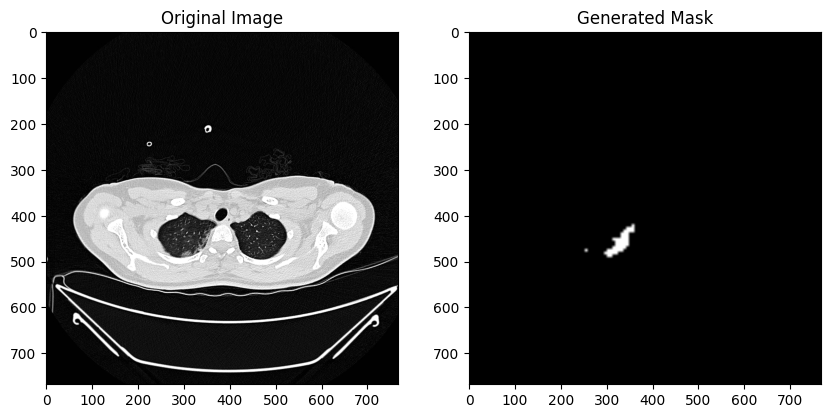

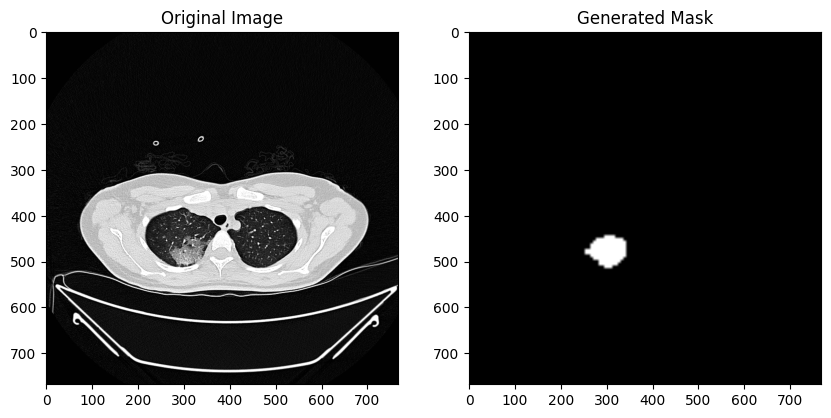

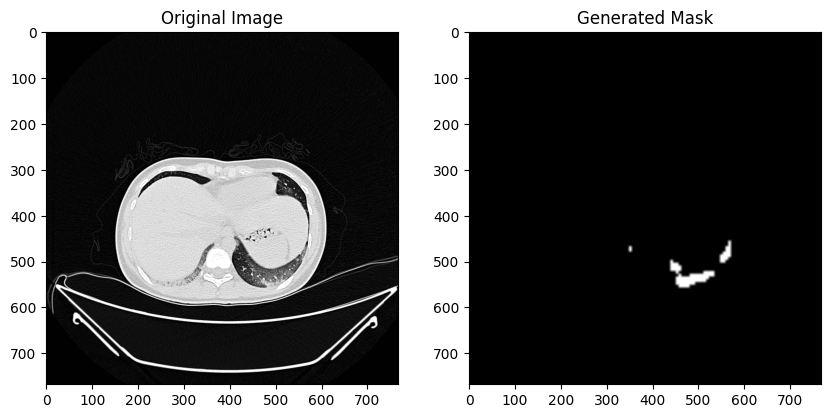

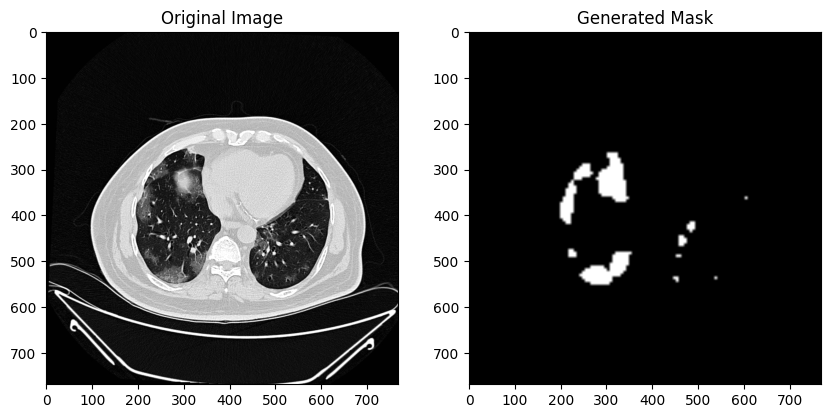

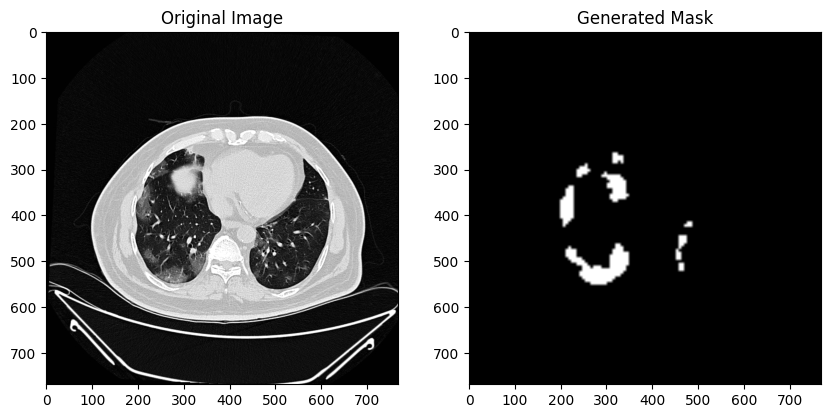

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Paths to your images and masks
covid_data_dir = '/content/drive/MyDrive/FYP/segmentation/Covid'  # Original images
output_dir = '/content/drive/MyDrive/FYP/Masks'  # Generated masks

def visualize_predictions(image_dir, mask_dir, num_samples=5):
    images = sorted(os.listdir(image_dir))[:num_samples]

    for filename in images:
        img_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename)

        # Load images and masks for visualization
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        pred_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        plt.figure(figsize=(10, 5))

        # Display original image
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')

        # Display generated mask
        plt.subplot(1, 2, 2)
        plt.imshow(pred_mask, cmap='gray')
        plt.title('Generated Mask')

        plt.show()

**Visualization**

In [ ]:
visualize_predictions(covid_data_dir, output_dir, num_samples=5)